In [2]:
import math
def sigmoid(x):
  return 1/1(1+math.exp(-x))

  x=np.arrange(-5,5,0.01)
  sigmoid_x= [sigmoid(z) for z in x]
  tanh_x = [math.tanh(z) for z in x]
  plt.figure(figsize=(8,6))

  plt.axhline(0, color='gray')
  plt.axvline(0,color='gray')
  plt.plot(x,sigmoid_x, 'b-',label='sigmoid')
  plt.plot(x,tanh_x, 'r--', label='tanh')
  plt.legend()
  plt.legend()
  plt.show()

In [3]:
#4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

#인구 증가율과 고령인구 비율
x = [0.3,-0.78,1.26,0.03,1.11,0.24,-0.24,-0.47,-0.77,-0.37,-0.85,-0.47,-0.77,-0.37,-0.85,-0.41,-0.27,0.02,-0.76,2.66]

y=[12.27,14.44,11.87,18.75,17.52,16.37,19.78,19.51,12.65,14.74,10.72,21.94,12.83,15.51,17.14,14.42]

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=6,activation='tanh',input_shape=(1,)),
                           tf.keras.layers.Dense(units=1)
                        
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 딥러닝 네트워크의 학습
model.fit(x ,y ,epochs=10)

ValueError: ignored

In [9]:
model.predict(x)

array([[-0.03132645],
       [ 0.07055686],
       [-0.09212762],
       [-0.00321955],
       [-0.0870222 ],
       [-0.02530927],
       [ 0.02530927],
       [ 0.04721585],
       [ 0.06992713],
       [ 0.03809644],
       [ 0.07473741],
       [ 0.04721585],
       [ 0.06992713],
       [ 0.03809644],
       [ 0.07473741],
       [ 0.04182717],
       [ 0.0283404 ],
       [-0.0021467 ],
       [ 0.0692892 ],
       [-0.11723815]], dtype=float32)

ValueError: ignored

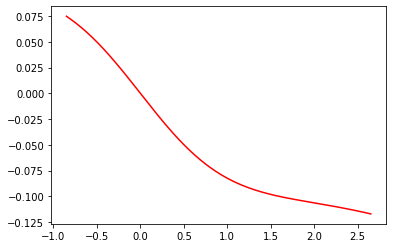

In [13]:
#딥러닝 네트워크 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(x),max(x),0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y, 'r-')
plt.plot(x,y,'bo')

plt.xlabel('population Growth rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [14]:
optimizer = tf.keras.optimizers.Adam(lr=0.07)

In [15]:
#a와 b를 랜덤한 값으로 초기화 함
#a=tf.Variable(random.random())
#b = tf.Variable(random.random())

a=tf.Variable(tf.random.uniform([1], 0, 1))
b=tf.Variable(tf.random.uniform([1], 0, 1))

In [22]:
def compute_loss():
  y_pred = a * x+b
  loss=tf.reduce_mean((y-y_pred) ** 2 )
  return loss

optimizer=tf.keras.optimizers.Adam(lr=0.07)

In [23]:
for i in range(1000):
  #잔차의 제곱의 평균을 최소화 합니다.
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b,numpy(), 'loss:', compute_loss().numpy())

InvalidArgumentError: ignored

ValueError: ignored

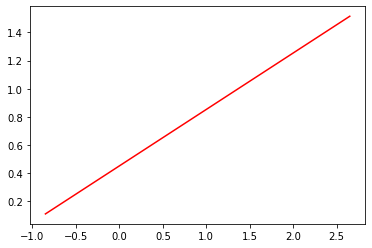

In [26]:
import matplotlib.pyplot as plt

line_x = np.arange(min(x), max(x), 0.01)
line_y = a * line_x +b

#그래프 그립니다
plt.plot(line_x,line_y,'r-')
plt.plot(x,y,'bo')
plt.xlabel()
plt.xlabel('population Growth rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

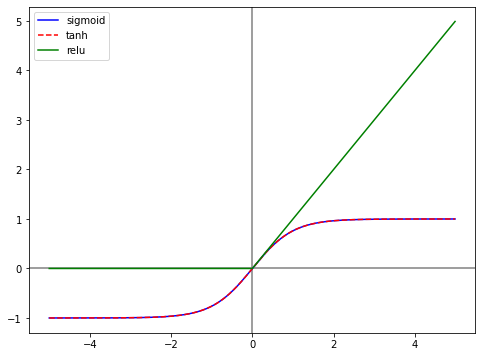

In [28]:
#보스턴 주택 가격

#활성화 함수

import math
def sigmoid(x):
  return  1/(1+math.exp(-x))

x=np.arange(-5,5,0.01)
sigmoid_x = [math.tanh(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z <0 else z for z in x]

plt.figure(figsize=(8,6))

plt.axhline(0, color='gray')
plt.axvline(0,color='gray')
plt.plot(x,sigmoid_x, 'b-',label='sigmoid')
plt.plot(x,tanh_x, 'r--', label='tanh')
plt.plot(x,relu,'g',label='relu')
plt.legend()
plt.show()


In [30]:
#데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X,test_Y) = boston_housing.load_data()

print(train_X.shape, test_X.shape)
print(train_X[0])
print(train_Y[0])

(404, 13) (102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [32]:
# 데이터 전처리 (정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [33]:
#데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(train_X.shape, test_X.shape)
print(train_X[0])
print(train_Y[0])

(404, 13) (102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [52]:
#Boston Housing Dataset 회귀 모델 생성
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
                                    tf.keras.layers.Dense(units=39, activation='relu'),
                                    tf.keras.layers.Dense(units=26, activation='relu'),
                                    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07),loss='mse')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_15 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_16 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [39]:
#회귀 모델 학습

history = model.fit(train_X, train_Y, epochs=25,
                    batch_size= 32,
                    validation_split=0.25)

Epoch 1/25


ValueError: ignored

In [40]:
#회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

NameError: ignored

In [42]:
#회귀 모델 평가
model.evaluate(test_X,test_Y)

ValueError: ignored

In [43]:
#실제 주택 가격과 예측 주택 가격 시각화

import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y,'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y),max(test_Y)])


#y=x에 대한 대각선
plt.plot([min(test_Y), max(test_Y), min(test_Y),max(test_Y)], *ls="--", c=".5")
plt.xlabel('test_Y')
plt.y_label('pred_Y')

SyntaxError: ignored

In [44]:
##자동으로 학습 중단

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25


ValueError: ignored

In [47]:
#실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt
pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y),max(test_Y),min(test_Y), max(test_Y)])

plt.plot([min(test_Y),max(test_Y),min(test_Y), max(test_Y)], ls='--', c=".3")
plt.xlabel("test_Y")
plt.ylabel('pred_Y')

plt.show()

ValueError: ignored

In [51]:
#모델 재정의 및 학습, dropout 사용

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(units=39, activation='relu'),
                             tf.keras.layers.Dense(units=26, activation='relu'),
                             tf.keras.layers.Dropout(.1),
                             tf.keras.layers.Dense(units=1)
])


model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])



Epoch 1/25
10/10 [==============================] - 0s 11ms/step - loss: 3681.8689 - val_loss: 164.7023
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 226.7039 - val_loss: 156.9843
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 166.0196 - val_loss: 168.7029
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 152.7957 - val_loss: 122.8860
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 136.5466 - val_loss: 132.0122
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 112.5670 - val_loss: 111.3693
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 133.2837 - val_loss: 95.1316
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 110.8995 - val_loss: 110.7856
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 103.2651 - val_loss: 126.6165
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 104.5291

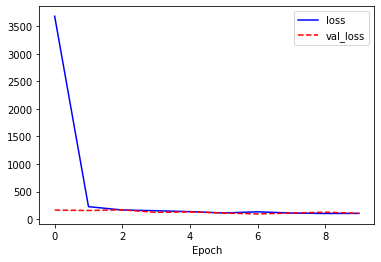

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [54]:
#회귀 모델 평가

model.evaluate(test_X,test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 360.6231


360.6230773925781

In [ ]:
#자동차 연비 데이터로 회귀분석